In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\1388376198.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = 'train.csv'
df = pd.read_csv(data)
df.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

In [6]:
df.describe()

,id,day,duration,contactId,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
count,3.148000e+04,31480.000000,31480.000000,3.148000e+04,31480.000000,31480.000000,31480.000000,5738.000000,31480.000000
mean,4.321650e+08,15.799015,258.498380,3.464717e+07,40.935737,1348.535133,2.779670,225.272395,0.584339
std,1.304725e+04,8.323251,256.576891,2.011538e+07,10.629198,2974.355578,3.139269,116.488328,2.469742
min,4.321423e+08,1.000000,0.000000,6.230000e+02,18.000000,-8019.000000,1.000000,1.000000,0.000000
25%,4.321536e+08,8.000000,104.000000,1.709904e+07,33.000000,70.000000,1.000000,133.000000,0.000000
50%,4.321650e+08,16.000000,180.000000,3.468141e+07,39.000000,442.000000,2.000000,195.000000,0.000000
75%,4.321762e+08,21.000000,320.000000,5.204811e+07,48.000000,1410.000000,3.000000,327.000000,0.000000
max,4.321876e+08,31.000000,4918.000000,6.954660e+07,95.000000,98417.000000,63.000000,871.000000,275.000000


In [30]:
# Sélectionnez uniquement les colonnes numériques
numeric_data = df.select_dtypes(include=[np.number])

# Convertissez les colonnes catégorielles en valeurs numériques en utilisant des techniques comme le one-hot encoding
data_numeric = pd.get_dummies(df, drop_first=True)

# Créez la matrice de corrélation
correlation_matrix = data_numeric.corr()
print('CORRELATION')
correlation_matrix


CORRELATION


,id,day,duration,contactId,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,target_yes,...,education_uniGraduated,education_unknown,creditFailure_yes,house_yes,credit_yes,contactType_landline,contactType_unknown,lastCampaignResult_other,lastCampaignResult_success,lastCampaignResult_unknown
id,1.000000,-0.065444,0.009464,-0.003497,0.024042,0.077153,-0.105859,0.052864,0.254589,0.295875,...,0.114016,-0.007585,-0.053529,-0.180557,-0.082936,0.131445,-0.751136,0.208473,0.263743,-0.496746
day,-0.065444,1.000000,-0.032338,-0.008226,-0.010246,0.007561,0.159577,-0.081010,-0.055621,-0.034360,...,0.024669,0.000370,0.005178,-0.022938,0.012084,0.020127,-0.027560,-0.035044,-0.038802,0.096715
duration,0.009464,-0.032338,1.000000,-0.010674,-0.003884,0.020149,-0.084273,-0.015659,0.002627,0.394059,...,0.000078,-0.000991,-0.013002,0.009192,-0.008529,-0.027039,-0.011196,-0.002124,0.038712,-0.003317
contactId,-0.003497,-0.008226,-0.010674,1.000000,-0.000214,-0.002786,-0.003471,-0.007785,-0.006997,-0.007701,...,0.000850,-0.000758,0.002710,0.012664,-0.001501,-0.005646,0.008499,0.000351,0.001124,-0.004284
age,0.024042,-0.010246,-0.003884,-0.000214,1.000000,0.098253,0.005781,-0.121615,0.001772,0.027318,...,-0.082937,0.071414,-0.017971,-0.183660,-0.015364,0.168775,-0.021926,-0.027094,0.043747,-0.000081
accountBalance,0.077153,0.007561,0.020149,-0.002786,0.098253,1.000000,-0.012162,-0.113656,0.016798,0.056258,...,0.084953,0.009998,-0.067757,-0.064963,-0.082530,0.040637,-0.038466,0.006138,0.038540,-0.029881
numberOfContacts,-0.105859,0.159577,-0.084273,-0.003471,0.005781,-0.012162,1.000000,0.032734,-0.030570,-0.075685,...,0.021976,0.005718,0.016861,-0.018545,0.009225,0.050477,0.010440,-0.019465,-0.055704,0.106854
daySinceLastCampaign,0.052864,-0.081010,-0.015659,-0.007785,-0.121615,-0.113656,0.032734,1.000000,-0.013978,-0.147378,...,-0.140489,-0.019028,0.035227,0.334828,0.022794,-0.030029,0.183053,0.015042,-0.251659,-0.001762
numberOfContactsLastCampaign,0.254589,-0.055621,0.002627,-0.006997,0.001772,0.016798,-0.030570,-0.013978,1.000000,0.084866,...,0.025335,-0.008316,-0.017329,0.038140,-0.006243,0.026247,-0.144722,0.288097,0.188092,-0.501023
target_yes,0.295875,-0.034360,0.394059,-0.007701,0.027318,0.056258,-0.075685,-0.147378,0.084866,1.000000,...,0.072252,0.005554,-0.021160,-0.136624,-0.065565,0.014113,-0.150254,0.035229,0.299590,-0.166636


C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\954308790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


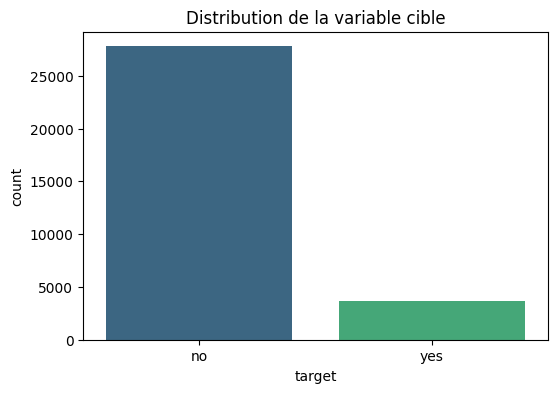

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution de la variable cible')
plt.show()


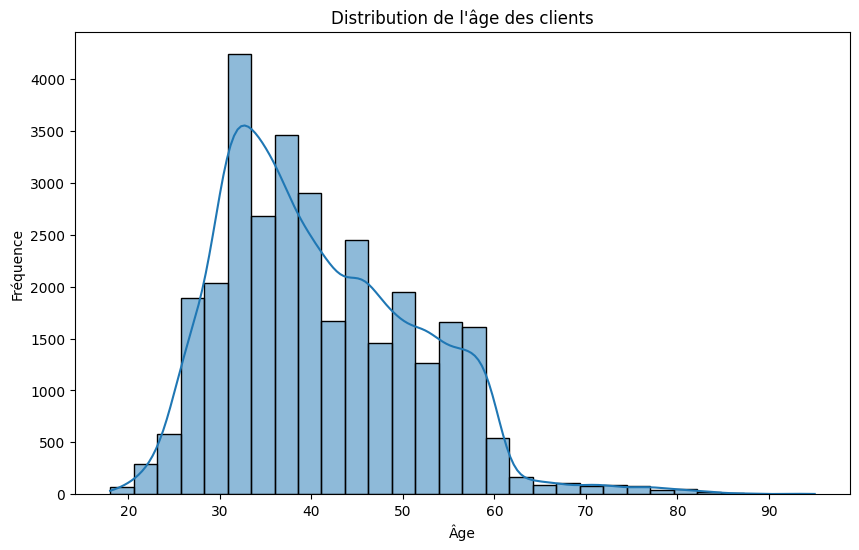

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution de l\'âge des clients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\437136987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette='viridis')


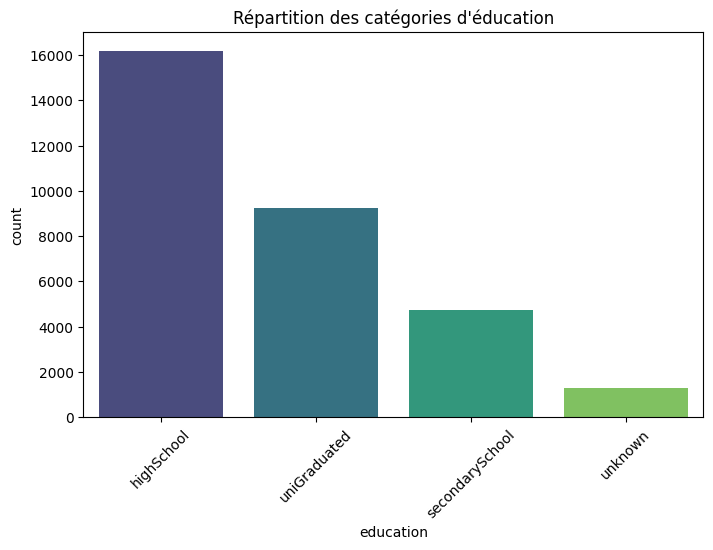

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='education', data=df, palette='viridis')
plt.title('Répartition des catégories d\'éducation')
plt.xticks(rotation=45)
plt.show()


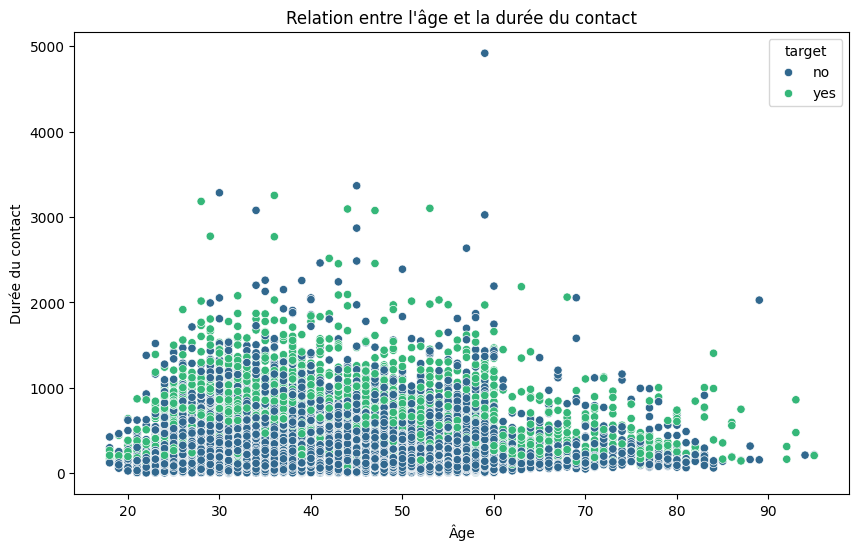

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', data=df, hue='target', palette='viridis')
plt.title('Relation entre l\'âge et la durée du contact')
plt.xlabel('Âge')
plt.ylabel('Durée du contact')
plt.show()


C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\27002628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lastCampaignResult', data=df, palette='viridis')


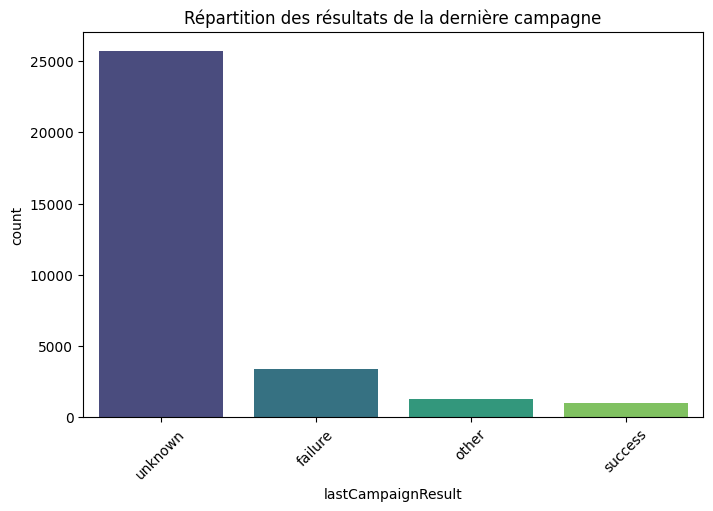

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='lastCampaignResult', data=df, palette='viridis')
plt.title('Répartition des résultats de la dernière campagne')
plt.xticks(rotation=45)
plt.show()


C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\1990512036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='accountBalance', data=df, palette='viridis')


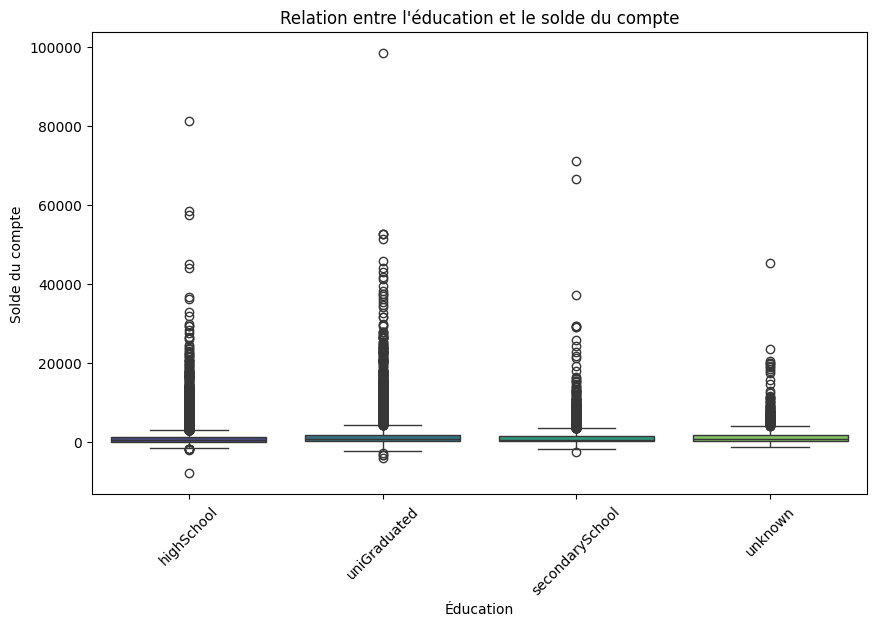

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='accountBalance', data=df, palette='viridis')
plt.title('Relation entre l\'éducation et le solde du compte')
plt.xticks(rotation=45)
plt.xlabel('Éducation')
plt.ylabel('Solde du compte')
plt.show()


C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\3539515048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=df, palette='viridis')


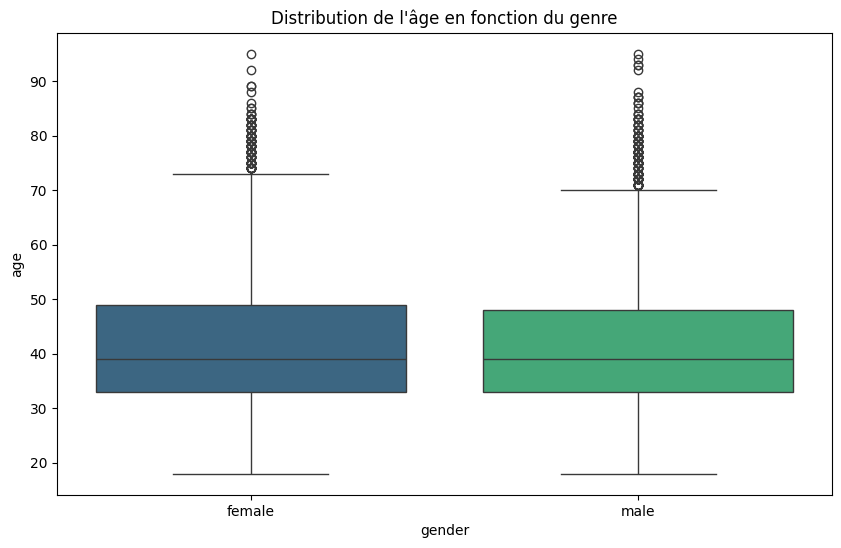

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df, palette='viridis')
plt.title('Distribution de l\'âge en fonction du genre')
plt.show()


C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\2773055193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, order=df['month'].value_counts().index, palette='viridis')


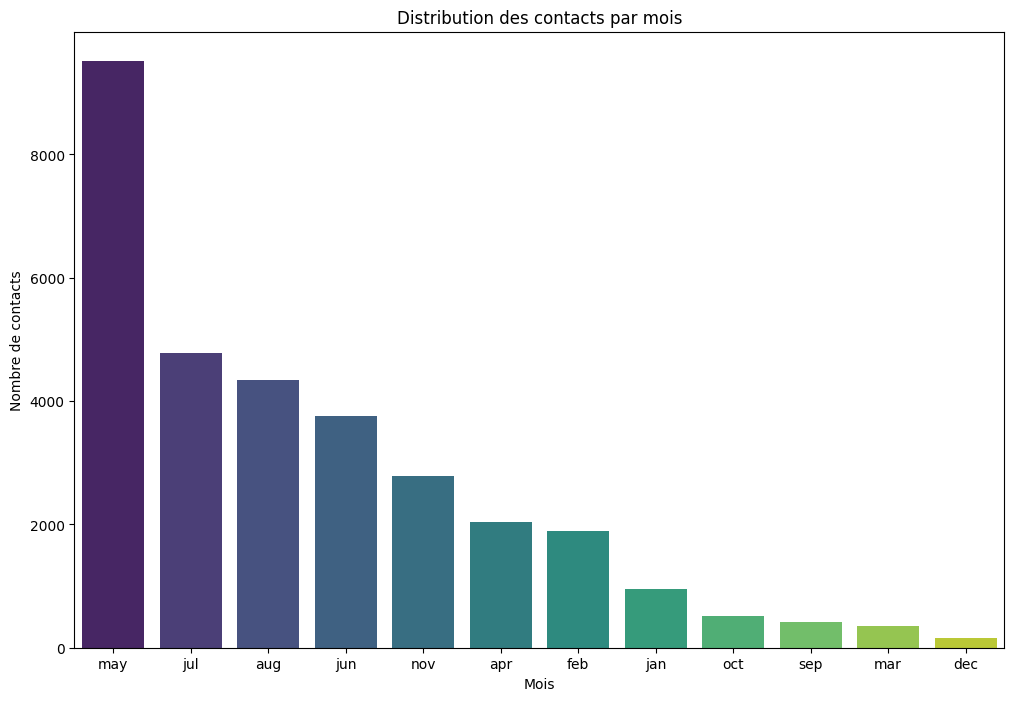

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(x='month', data=df, order=df['month'].value_counts().index, palette='viridis')
plt.title('Distribution des contacts par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de contacts')
plt.show()


C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\1963700991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='contactType', data=df, palette='viridis')


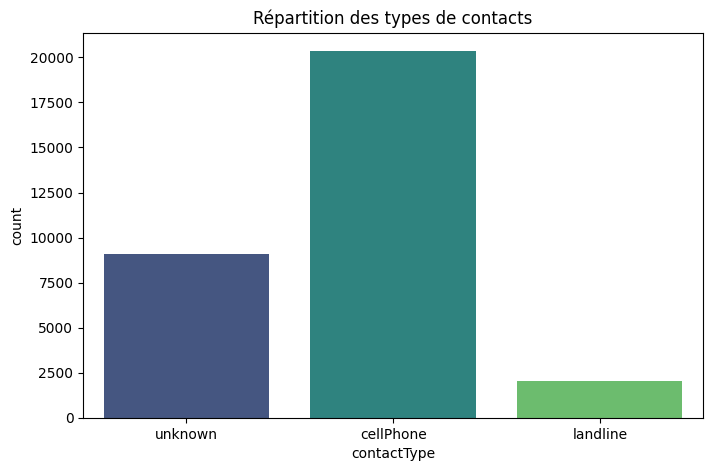

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='contactType', data=df, palette='viridis')
plt.title('Répartition des types de contacts')
plt.show()


C:\Users\Adame\AppData\Local\Temp\ipykernel_36824\3400459052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='accountBalance', data=df, palette='viridis')


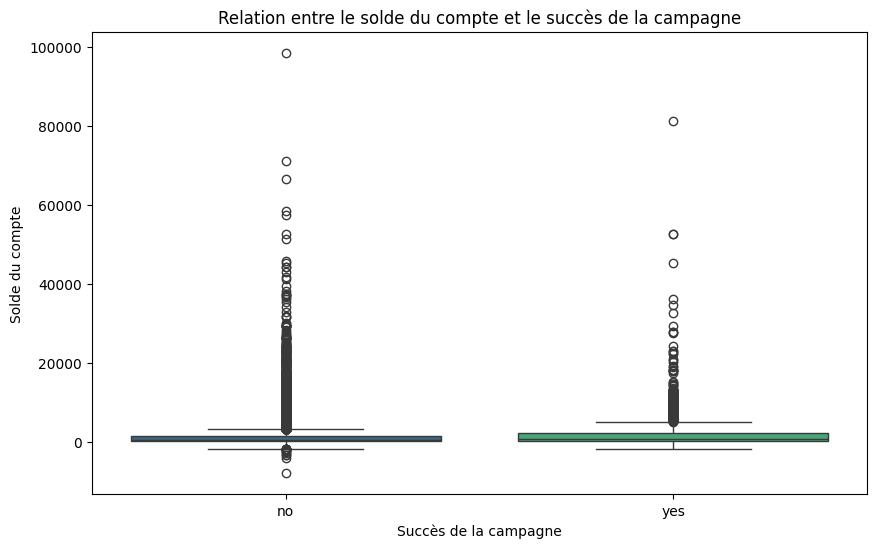

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='accountBalance', data=df, palette='viridis')
plt.title('Relation entre le solde du compte et le succès de la campagne')
plt.xlabel('Succès de la campagne')
plt.ylabel('Solde du compte')
plt.show()


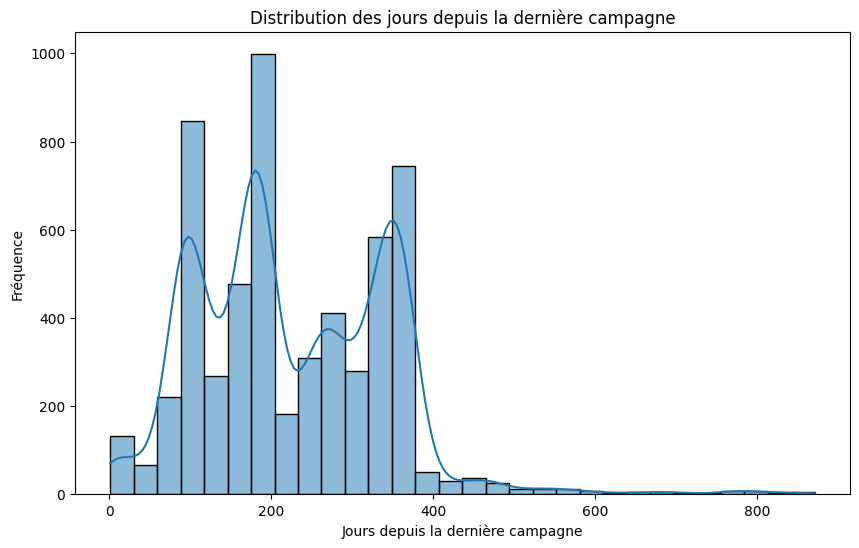

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['daySinceLastCampaign'], bins=30, kde=True)
plt.title('Distribution des jours depuis la dernière campagne')
plt.xlabel('Jours depuis la dernière campagne')
plt.ylabel('Fréquence')
plt.show()
